# Plotting your genomes' projection onto 1000 genomes data


Before running this notebook, make sure to create the file `1000G.pca.txt`.

You can do this using [akt](https://github.com/Illumina/akt) with a following command (assuming that you are in root directory of the akt): 

```
akt pca --assume-homref -W ./data/wgs.grch37.vcf.gz ../../genomes/GFX00000000.filtered.snp.vcf.gz > 1000G.pca.txt
```

For the purpose of this notebook, the result is saved to `results/ancestry/1000G.pca.txt`

You will also need this file from akt: `akt/data/wgs.1000G.phase3.pca`, which contains the principal component coordinates for the 1000 genomes.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import os

### Import PCA and information about populations from akt

In [3]:
# path to akt files
# file with ethnicity labels
lbl_path = os.path.join("../../PersonalGenome", "src", "akt/data/integrated_call_samples_v3.20130502.ALL.panel")
# file with pca data
akt = os.path.join("../../PersonalGenome", "src", "akt/data/wgs.1000G.phase3.pca")

In [24]:
# read in the files
lbl = pd.read_csv(lbl_path, sep=r"\s+", index_col=0)
pc = pd.read_csv(akt, sep=r"\s+", index_col=0, header=None)

In [26]:
pc.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
HG00096,20.5863,38.3197,7.38349,-12.4928,1.778960,2.170390,0.047681,0.674180,-1.306390,6.48605,6.65693,2.27054,1.48416,-0.915908,6.72022,0.490435,-7.53264,11.610000,3.37071,0.577314
HG00097,20.4292,39.0879,6.96485,-10.2921,0.691669,0.458462,-1.351560,-0.593777,0.822316,6.65001,8.05282,-2.16934,-10.98140,-5.332690,3.26468,0.209461,-4.87626,-0.508729,-9.18354,-2.454350


In [27]:
lbl.head(2)

,pop,super_pop,gender
sample,,,
HG00096,GBR,EUR,male
HG00097,GBR,EUR,female


In [32]:
# put them together
data = pd.concat([lbl, pc], axis = 1)
data.head(2)

,pop,super_pop,gender,1,2,3,4,5,6,7,...,11,12,13,14,15,16,17,18,19,20
HG00096,GBR,EUR,male,20.5863,38.3197,7.38349,-12.4928,1.778960,2.170390,0.047681,...,6.65693,2.27054,1.48416,-0.915908,6.72022,0.490435,-7.53264,11.610000,3.37071,0.577314
HG00097,GBR,EUR,female,20.4292,39.0879,6.96485,-10.2921,0.691669,0.458462,-1.351560,...,8.05282,-2.16934,-10.98140,-5.332690,3.26468,0.209461,-4.87626,-0.508729,-9.18354,-2.454350


### Import our sample

In [60]:
me = pd.read_csv("../results/ancestry/1000G.pca.txt", sep = '\t', header = None, index_col = 0)
my_pc1 = me.iloc[0][1]
my_pc2 = me.iloc[0][2]

### Visualize our sample on first two principal components

We color by superpopulations (Europe, East Asia, America, South East Asia, Africa) for convenience.

You can customize colors, marker shape and size and adjust position of the text depending on where you are in this map.

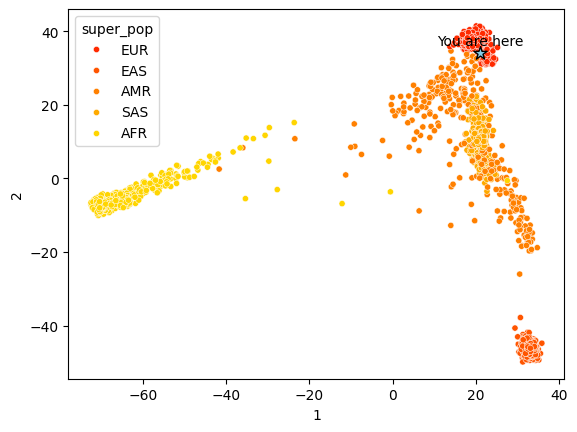

In [105]:
# plot 1000 genomes and color by superpopulation
ax = sns.scatterplot(data=data, x = 1, y = 2, hue = 'super_pop', palette = "autumn", s = 20)
# add a star where our genome is
ax.scatter(my_pc1, my_pc2, c = 'skyblue', edgecolors='black', marker = "*", s = 100)
# add text
ax.text(my_pc1, my_pc2+2, "You are here", horizontalalignment = "center")
plt.savefig('../images/pca.png', dpi = 150);